## Loading Credit Card Data from Excel file

In [5]:
import math
import numpy as np
from matplotlib import pyplot as plt
from openpyxl import load_workbook
from sklearn.neural_network import MLPClassifier
from random import shuffle
import random
from statistics import mean, stdev

In [8]:
#Opening the Excel file with data
filepath="credit_card_data.xlsx" #Enter full filepath here
wb=load_workbook(filepath)
sheet=wb.active

#set-wise data read-in 
def read(num):
    x, y = [], []
    
# 1. Male, 2. Age, 3. Debt, 4. Married, 5. Bank Customer, 6. Education Level, 7. Ethnicity, 8. Years Employed, 
# 9.Prior Default, 10. Employed, 11. Credit Score, 12. Driver's License, 13. Citizen, 14. Zip Code, 15. Income

#Columns to read in
    cols = [8, 9, 10, 11]
    for i in cols:
        x.append(sheet.cell(row=num+1,column=i).value)
    y.append(sheet.cell(row=num+1,column=16).value)
    return x, y

x_data, y_data = [], []
for j in range(1, 690):
    valx, valy = read(j)
    if "?" in valx:
        print(j, read(j))
    x_data.append(valx)    
    y_data.append(valy)
print(x_data[0:5], y_data[0:5])
print(len(x_data), len(y_data))

[[1.25, 1, 1, 1], [3.04, 1, 1, 6], [1.5, 1, 0, 0], [3.75, 1, 1, 5], [1.71, 1, 0, 0]] [[1], [1], [1], [1], [1]]
689 689


## Column-wise data load

In [9]:
#Opening the Excel file with data
filepath="credit_card_data.xlsx" #Enter full filepath here
wb=load_workbook(filepath)
sheet=wb.active

def colread(col):
    colval = []
    for i in range(2, 692):
        colval.append(sheet.cell(row=i, column=col).value)
    return colval

## Quantification of data

Attributes like Male, Married, BankCustomer, EducationLevel, Ethnicity, DriversLicense, Citizen,  and Approved are expressed as characters in the data. <br> To quantify them, the number of unique characters in each attribute column were found and were given numerical markers. <br>

Male:            a, b.<br>
Married:	     u, y, l.<br>
BankCustomer:    g, p.<br>
EducationLevel:	 c, d, i, j, k, m, r, q, w, x, e, aa, ff.<br>
Ethnicity:	     v, h, bb, j, n, z, dd, ff, o.<br>
Prior Default:	 t, f.<br>
Employed:        t, f.<br>
DriversLicense:  t, f.<br>
Citizen:         g, p, s.<br>

Label Approval:  +,- (class attribute)<br>

This was converted to:-<br>

Male:            0, 1.<br>
Married:	     0, 1, 2.<br>
BankCustomer:    0, 1.<br>
EducationLevel:	 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.<br>
Ethnicity:	     0, 1, 2, 3, 4, 5, 6, 7, 8.<br>
Prior Default:	 1, 0.<br>
Employed:        1, 0.<br>
DriversLicense:  1, 0.<br>
Citizen:         0, 1, 2.<br>

Label Approval:  1, 0 (class attribute)<br>

## ANN on Credit Card Data

Using only complete datasets. Ignoring all datasets with missing values.

In [10]:
from random import shuffle

#shuffling data to remove any existing biases
toshuffle = list(zip(x_data, y_data))
x_data, y_data = zip(*toshuffle)
print(x_data[0:5])

([1.25, 1, 1, 1], [3.04, 1, 1, 6], [1.5, 1, 0, 0], [3.75, 1, 1, 5], [1.71, 1, 0, 0])


85.39325842696628
86.51685393258427
86.51685393258427
86.51685393258427
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
86.51685393258427
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
86.51685393258427
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
86.51685393258427
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
86.51685393258427
86.51685393258427
85.39325842696628
86.51685393258427
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
86.51685393258427
85.39325842696628
86.51685393258427
85.39325842696628
86.51685393258427
86.51685393258427
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
85.39325842696628
86.51685393258427
85.39325842696628
86.51685393258427
85.39325842696628
85.39325842696628
85.39325842696628
85.3932584

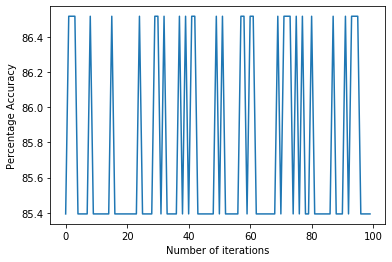

In [23]:
from sklearn.neural_network import MLPClassifier
from random import shuffle
import random
from statistics import mean, stdev
from random import shuffle

#Dividing data to create test and train sets 
cut = 550
train_x, train_y = x_data[0:cut], y_data[0:cut]
test_x, test_y = x_data[cut:690], y_data[cut:690]

per_acc = []

#Runs 100 iterations
for i in range(100):
    p = MLPClassifier(activation= 'tanh', hidden_layer_sizes= (100,), learning_rate= 'constant',  max_iter= 100, 
                      solver= 'lbfgs', tol= 0.01, validation_fraction= 0.1, early_stopping=True,
                      n_iter_no_change=100, verbose=True)

    train_y = np.asarray(train_y)
    p.fit(train_x, train_y.ravel())

    prediction = p.predict_proba(test_x)

    c = 0
    for each in range(len(prediction)):
        if np.argmax(prediction[each]) == test_y[each]:
            c += 1

    per =  float(c / len(prediction)) * 100
    print(per)

    per_acc.append(per)

x = np.arange(0, 100)
plt.plot(x, per_acc)
plt.xlabel('Number of iterations')
plt.ylabel('Percentage Accuracy')
plt.show() 

In [5]:
#Returns the mean and standard deviation of accuracies from 100 iterations
print(mean(per_acc))
print(stdev(per_acc))

92.76
0.4948216697442472


In [6]:
from heapq import nlargest

#Returns 5 largest accuracies
sort = nlargest(5, per_acc)
print(sort)

[93.0, 93.0, 93.0, 93.0, 93.0]


In [7]:
#Returns the mean and standard deviation of accuracies for 5 largest accuracies

print(mean(sort))
print(stdev(sort))

93.0
0.0


In [147]:
#Using scikit-learn's GridSearch for parameter optimization

import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time

X, y = x_data, y_data
X, y = np.asarray(X), np.asarray(y)


# build a classifier
clf = MLPClassifier(learning_rate='constant', early_stopping=True, random_state=53450)

# Utility function to report best scores
def report(results, n_top=20):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
params = {'hidden_layer_sizes': [(10, ), (100, ), (50, ), (250, ), (500, )],
          'activation': ['identity', 'logistic', 'tanh', 'relu'],
          'solver': ['lbfgs', 'sgd', 'adam'],
          'learning_rate': ['constant', 'invscaling', 'adaptive'],
          'max_iter': [100, 250, 500],
          'tol': [0.01, 0.001, 0.0001],
          'validation_fraction': [0.1, 0.15, 0.2],
          'n_iter_no_change': [50, 100, 250, 500]
          }


# run grid search
grid_search = GridSearchCV(clf, param_grid=params)
start = time()
grid_search.fit(X, y.ravel())

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
% (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV took 46.82 seconds for 60 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.790 (std: 0.029)
Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (10,), 'solver': 'lbfgs'}

Model with rank: 2
Mean validation score: 0.760 (std: 0.047)
Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'}

Model with rank: 3
Mean validation score: 0.753 (std: 0.015)
Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (250,), 'solver': 'lbfgs'}

Model with rank: 4
Mean validation score: 0.747 (std: 0.022)
Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'}

Model with rank: 5
Mean validation score: 0.746 (std: 0.005)
Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'solver': 'lbfgs'}

Model with rank: 5
Mean validation score: 0.746 (std: 0.022)
Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (500,), 'solver': 'lbfgs'}

Model with rank: 7
Mean validation score: 0.744 (s

c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
